<p style="align: center;"><img src="https://raw.githubusercontent.com/dimkablin/SegmentationSM/master/src/logo2.jpg", width=550, height=300></p>

<h1 style="text-align: center;"><b>Backend SM</b></h1>
<h2 style="text-align: center;"><b>Поиск архитекутуры для сегментации объекта для проекта SM </b></h2>

In [1]:
import os
from LookGenerator.config.config import DatasetConfig

config = DatasetConfig(os.environ)
config.show_details()

DATASET_DIR
BACKGROUND_DATASET


In [2]:
print(config.BACKGROUND_DATASET, config.DATASET_DIR)

C:\Users\dimka\PycharmProjects\data\background C:\Users\dimka\PycharmProjects\data\zalando-hd-resized\train


## Инициализируем датасет и dataloader

In [42]:
from torchvision.transforms import ToTensor, ToPILImage, PILToTensor
import torch
import os
import numpy as np
from typing import Tuple
import random

from PIL import Image
from torch.utils.data import Dataset

In [68]:
class OblDataset(Dataset):
    """ Dataset for Segmentation upper body """

    def __init__(self,
                 image_root: str,
                 mask_root: str,
                 background_root: str = None,
                 image_extension="jpg",
                 background_extension="png",
                 transform_input=None,
                 transform_output=None,
                 augment=None):
        """
        Args:
            image_root (str) : path to images
            mask_root (str) : images directory name
            background_root (str) : path to background to change on
            extension (str) : extension of any file
        """

        super().__init__()

        self.image_root = image_root
        self.mask_root = mask_root
        self.background_root = background_root
        self.image_extension = image_extension
        self.background_extension = background_extension

        self.transform_input = transform_input
        self.transform_output = transform_output
        self.augment = augment

        names_of_files = os.listdir(self.image_root)
        self._files_list = [name.split('.')[0] for name in names_of_files]

        if self.background_root:
            background_names_of_files = os.listdir(self.background_root)
            self.background_files_list = [name.split('.')[0] for name in background_names_of_files]

    def __getitem__(self, idx: int) -> Tuple[np.array, np.array]:
        """
        Opening image by index that considered self.names_of_files variable

        Args:
            idx: The index of data sample

        Returns:
            Return _ that represent image
                   _ that represent mask
        """

        _image = Image.open(os.path.join(
                self.image_root,
                self._files_list[idx])
                    + "." + self.image_extension
            )

        _mask = Image.open(os.path.join(
                self.mask_root,
                self._files_list[idx])
                    + "." + self.image_extension
            )

        if self.background_root:
            _image, _mask = self._suit_background(image=_image,
                                          mask=_mask,
                                          background=self._get_background(size=_image.size),
                                          layer_to_change=0)
            _image = ToTensor()(_image)
            _mask = ToTensor()(_mask)
        else:
            _image = PILToTensor()(_image)
            _mask = PILToTensor()(_mask)

        if self.augment:
            transformed = self.augment(image=_image,
                                       mask=_mask)
            _image = transformed['image']
            _mask = transformed['mask']

        if self.transform_input:
            _image = self.transform_input(_image)

        if self.transform_output:
            _mask = self.transform_output(_mask)

        return _image, _mask

    def _get_background(self, size, idx = None) -> Image.Image:
        """
        Return resized background as np.array

        Args:
             size (Tuple[int, int]) : output size image
             idx (int) : index of background. If idx equals None it returns random background

        Returns:
            Resized background
        """
        if not idx:
            idx = random.randint(0, len(self.background_files_list) - 1)

        background = Image.open(os.path.join(
                self.background_root,
                self.background_files_list[idx])
                    + "." + self.background_extension
            )

        return background.resize(size)

    def _suit_background(self,
                         image: Image.Image,
                         mask: Image.Image,
                         background: Image.Image,
                         layer_to_change: int):
        """
        Returning image with background
        """
        if not self.background_root:
            return None

        image = np.array(image)
        mask = np.array(mask)
        background = np.array(background)

        assert image.shape == mask.shape and image.shape == background.shape

        layer = (mask == layer_to_change)
        image[layer] = background[layer]

        return image, layer.astype(int)

    def __get_files_list__(self):
        """
        Returning list of file

        Returns:
            list with names of files
        """

        return self._files_list

    def __len__(self):
        """
        Return count of files

        Return:
            length of self._files_list
        """

        return len(self._files_list)

    def __get_background_files_list__(self):
        return self.background_files_list


In [69]:
size = (256, 1092)

imageWithBackgroundDataset = OblDataset(image_root=os.path.join(config.DATASET_DIR, "image"),
                                        mask_root=os.path.join(config.DATASET_DIR, "agnostic-v3.2"),
                                        background_root=config.BACKGROUND_DATASET,
                                        image_extension="jpg",
                                        background_extension="png")


In [70]:
import matplotlib.pyplot as plt

def _print(image, mask):
    fig = plt.figure(figsize=(20, 14))

    fig.add_subplot( 1, 2, 1)
    plt.imshow(ToPILImage()(image))

    fig.add_subplot( 1, 2, 2)
    plt.imshow(mask[0])

In [71]:
image, mask = imageWithBackgroundDataset.__getitem__(0)
print(image.size(), mask.size())

torch.Size([3, 1024, 768]) torch.Size([3, 1024, 768])


In [74]:
imageWithBackgroundDataset.__get_background_files_list__().__len__()

5

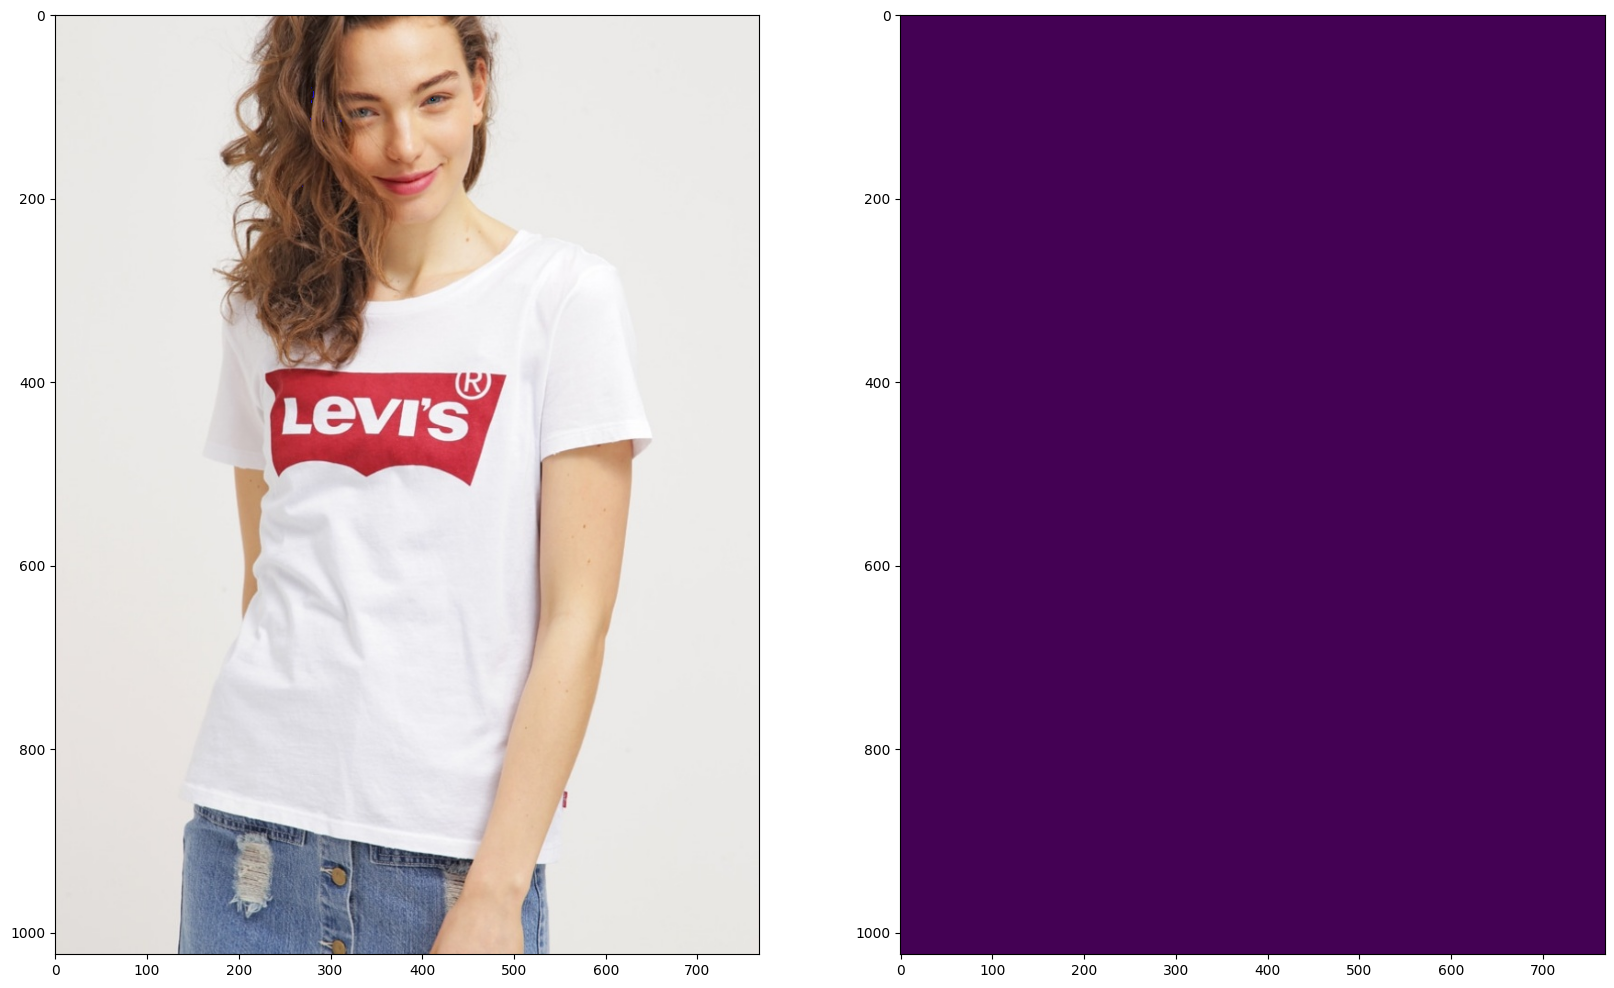

In [73]:
_print(image, mask)

## Реализируем основной цикл обучения

In [ ]:
import os
import time

In [ ]:
def train(model, optim, loss, epochs, dataloaders):
    loss_history = []
    iou_history = []
    time_history = []

    running_loss = 0
    running_iou = 0

    for epoch in range(epochs):
        since = time.time()
        for phase in ['train', 'val']:
            if phase == 'train':
                pass

        time_history.append(time.time() - since)



# Architectures
## 1. our Unet

## 2. SegNet

## 3. a few Unet's arhc